In [2]:
#1.image Translation
#2.Image Rotate
#3.Image Resize
#4.Image Flipping 
#5.Image Cropping 

**** Image transformation is defined as An image can be transformed using an image to move it from one domain to another. The detection of features that might not be as easily seen in the spatial domain is made possible by viewing an image in domains like frequency or Hough space.****

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 


In [4]:
imagedata = cv2.imread("../input/cat2image/cat2.jpg")

In [5]:
imagedata 

array([[[105, 109, 110],
        [107, 111, 112],
        [108, 112, 113],
        ...,
        [ 88,  95,  98],
        [ 87,  94,  97],
        [ 87,  94,  97]],

       [[104, 108, 109],
        [107, 111, 112],
        [109, 113, 114],
        ...,
        [ 84,  91,  94],
        [ 83,  90,  93],
        [ 83,  90,  93]],

       [[105, 109, 110],
        [107, 111, 112],
        [107, 111, 112],
        ...,
        [ 84,  91,  94],
        [ 84,  91,  94],
        [ 84,  91,  94]],

       ...,

       [[165, 171, 176],
        [166, 173, 176],
        [156, 163, 166],
        ...,
        [ 41,  44,  48],
        [ 71,  74,  79],
        [ 50,  52,  60]],

       [[153, 159, 166],
        [156, 162, 169],
        [168, 174, 181],
        ...,
        [ 84,  87,  91],
        [116, 120, 125],
        [ 87,  90,  98]],

       [[151, 156, 165],
        [161, 166, 175],
        [131, 136, 145],
        ...,
        [ 71,  76,  77],
        [ 85,  92,  95],
        [ 95, 101, 106]]

In [6]:
def catimageshow(imagetitle,image):
    if len(image.shape) ==3:
        imagevariable = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    if image.shape[2] == 1:
        imagevariable = cv2.cvtColor(image,COLOR_RGB2GRAY)
    plt.figure(figsize = (4,2))
    plt.imshow(imagevariable)
    plt.title(imagetitle)

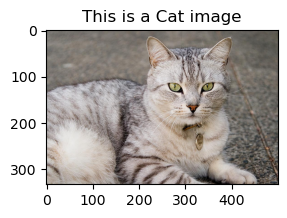

In [7]:
catimageshow("This is a Cat image",imagedata)

In [8]:
#image translation
translationX = 10
translationY = 150
Modifiedimage = np.float32([[1,0,translationX],[0,1,translationY]])


**Translation
 On the screen, a translation shifts an object's location. Adding the translation coordinates (tx, ty) to the original coordinates X, Y yields the new coordinates X′, Y′, which allows for 2D point translation.
**

In [9]:
Modifiedimage

array([[  1.,   0.,  10.],
       [  0.,   1., 150.]], dtype=float32)

In [10]:
imageshift = cv2.warpAffine(imagedata,Modifiedimage,(imagedata.shape[1],imagedata.shape[0]))

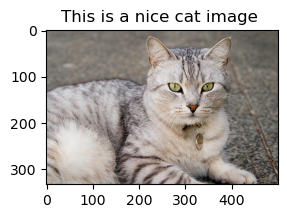

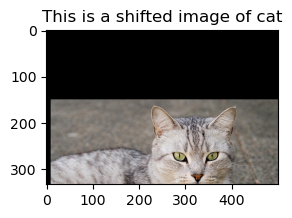

In [11]:
catimageshow("This is a nice cat image ",imagedata)
catimageshow("This is a shifted image of cat",imageshift)

In [12]:
def imagetranslation(image,translationX,translationY):
    modifiedimage = np.float32([[1,0,translationX],[0,1,translationY]])
    imageshift = cv2.warpAffine(imagedata,modifiedimage,
                            (imagedata.shape[1], imagedata.shape[0]))
    
    
    catimageshow("Cat Image", imagedata)
    catimageshow("Shifted Image",imageshift)

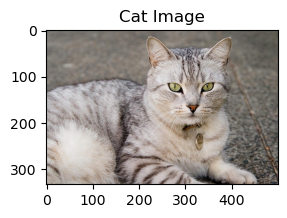

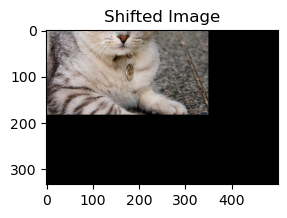

In [13]:
imagetranslation(imagedata, -150, -150)

# image rotation
OpenCV provides the getRotationMatrix2D() function to create the above transformation matrix.

The following is the syntax for creating the 2D rotation matrix:

**getRotationMatrix2D(center, angle, scale)**

The getRotationMatrix2D() function takes the following arguments:

**center**: the center of rotation for the input image

**angle:** the angle of rotation in degrees

**scale:** an isotropic scale factor which scales the image up or down according to the value provided




**Read more:**<a href="https://learnopencv.com/image-rotation-and-translation-using-opencv/"> image rotation and Image translation</a>

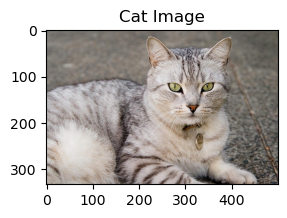

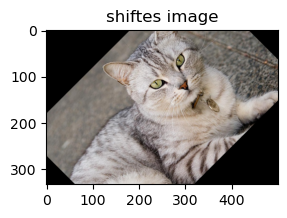

In [16]:
imagecenter = (imagedata.shape[1]/2,imagedata.shape[0]/2)
imageRotate = cv2.getRotationMatrix2D(imagecenter,45,1)
finalRotate = cv2.warpAffine(imagedata, imageRotate,
                            (imagedata.shape[1], imagedata.shape[0]))
catimageshow("Cat Image", imagedata)
catimageshow("shiftes image",finalRotate)

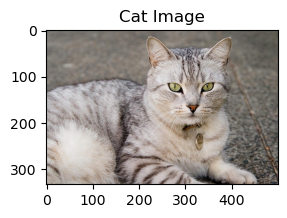

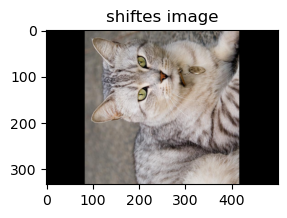

In [17]:
imagecenter = (imagedata.shape[1]/2,imagedata.shape[0]/2)
imageRotate = cv2.getRotationMatrix2D(imagecenter,90,1)
finalRotate = cv2.warpAffine(imagedata, imageRotate,
                            (imagedata.shape[1], imagedata.shape[0]))
catimageshow("Cat Image", imagedata)
catimageshow("shiftes image",finalRotate)

In [25]:
def imageRotation(imagecenter,angle,scale):
    imagecenter = (imagedata.shape[1]/2,imagedata.shape[0]/2)
    imageRotate = cv2.getRotationMatrix2D(imagecenter,90,1)
    finalRotate = cv2.warpAffine(imagedata, imageRotate,
                            (imagedata.shape[1], imagedata.shape[0]))
    catimageshow("Cat Image", imagedata)
    catimageshow("shiftes image",finalRotate)
    

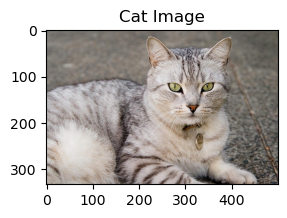

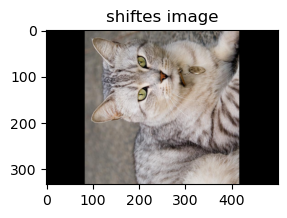

In [26]:
imageRotation(imagedata,180, 1)

In [27]:
imagedata.shape

(333, 500, 3)

# Image Resize
**The term "resize" refers to altering an image's dimensions, whether by adjusting the width, the height, or both. Furthermore, when an image is resized, the aspect ratio of the original image may be kept. OpenCV has a cv2.resize() function that allows for image resizing.**

****The syntax of resize function in OpenCV is**

**cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])****

In [33]:
def imageResize(imagedata, imageSize):
    imageResize = cv2.resize(imagedata, (imageSize, imageSize), interpolation = cv2.INTER_AREA)
    print("Before Resize Image Shape is : {}".format(imagedata.shape))
    catimageshow("Cat Image", imagedata)
    print("After Resize Image Shape is : {}".format(imageResize.shape))
    catimageshow("Resize Image",imageResize)
    

Before Resize Image Shape is : (333, 500, 3)
After Resize Image Shape is : (120, 120, 3)


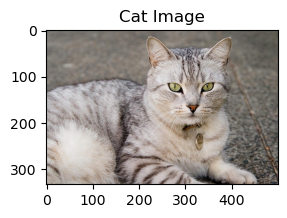

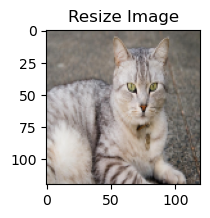

In [34]:
imageResize(imagedata, 120)

# Image Flipping 

**with the method cv2.flip in OpenCV, an image can be rotated (). The image can be rotated across the X, Y, or both axes with this function. To flip the image across the axis, it will receive the argument flag flipCode.**

**When the flipCode is set to a positive integer, such as one, the image is flipped across the Y-axis instead of across the x-axis as it is when the flipCode is set to 0. The image is flipped across both axes if the flipCode property is supplied to a negative integer, such "-1".**

**Steps
One could adhere to the guidelines below to flip an image:**

**Download the necessary libraries. The prerequisite Python library in each of the examples below is OpenCV. Be careful to install it beforehand.****

**Read more :**<a href = "https://www.tutorialspoint.com/how-to-flip-an-image-in-opencv-python#:~:text=In%20OpenCV%2C%20an%20image%20can,the%20image%20across%20the%20axis.">Image Flipping </a>

In [35]:
def imageFlipping(imagedata):
    imageResize = cv2.flip(imagedata, 0)
    print("Before Flipping Image")
    catimageshow("Cat Image", imagedata)
    print("After Flipping Image")
    catimageshow("Resize Image",imageResize)

Before Flipping Image
After Flipping Image


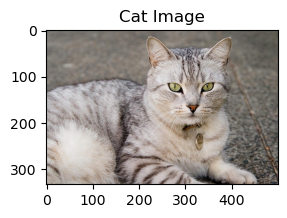

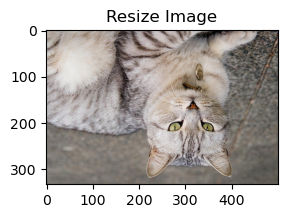

In [36]:
imageFlipping(imagedata)

# Image Cropping

In [39]:
def imageCropping(imagedata):
    imageResize = imagedata[100:200, 100:200]
    print("Before Image Crop")
    catimageshow("Cat Image", imagedata)
    print("After Image Crop")
    catimageshow("Resize Image",imageResize)

Before Image Crop
After Image Crop


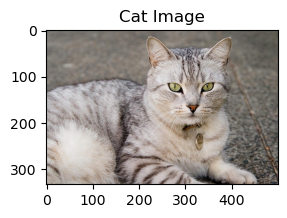

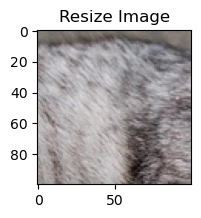

In [40]:
imageCropping(imagedata)